In [1]:
# Import necessary libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [2]:
# Use training set for building models

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Discover contents of training set

print('Number of samples in data: ', data.shape[0])
print('Number of columns in data: ', data.shape[1])
print('Columns in data: ', data.columns.values)

Number of samples in data:  891
Number of columns in data:  12
Columns in data:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# Use test set for making predictions

test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Discover contents of test set

print('Number of samples in test set: ', test_data.shape[0])
print('Number of columns in test set: ', test_data.shape[1])
print('Columns in test set: ', test_data.columns.values)

Number of samples in test set:  418
Number of columns in test set:  11
Columns in test set:  ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
# Separate PassengerId and Survived from actually features
# Save them in Series for future needs

passenger_id_train = data['PassengerId']
survived_train = data['Survived']

passenger_id_test = test_data['PassengerId']

# Delete from train data
# data.drop(columns=['PassengerId'], inplace=True)

# Delete from test data
# test_data.drop(columns=['PassengerId'], inplace=True)

In [7]:
# Discover statistics about training data

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check missing values in training data

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Missing values found in Age, Cabin and Embarked features from training data

# Check missing values in test data
# (Missing values found in Age, Cabin and Fare features from test data)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Сonclusions

There are 10 features in available data.
According to data description on https://www.kaggle.com/c/titanic/data:
1. Pclass - ticket class
2. Name
3. Sex
4. Age - age in years (missing values in training and test data)
5. SibSp - number of siblings / spouses aboard
6. Parch - number of parents / children aboard
7. Ticket - ticket number
8. Fare (missing values in test data)
9. Cabin - cabin number (missing values in training and test data)
10. Embarked - port of embarkation (missing values in train data)

### Next step:
Visualize available features, except missing values, to discover which of them are important predictors.

In [10]:
# Combine train and test data

all_data = pd.concat([data, test_data], sort=False).reset_index(drop=True)

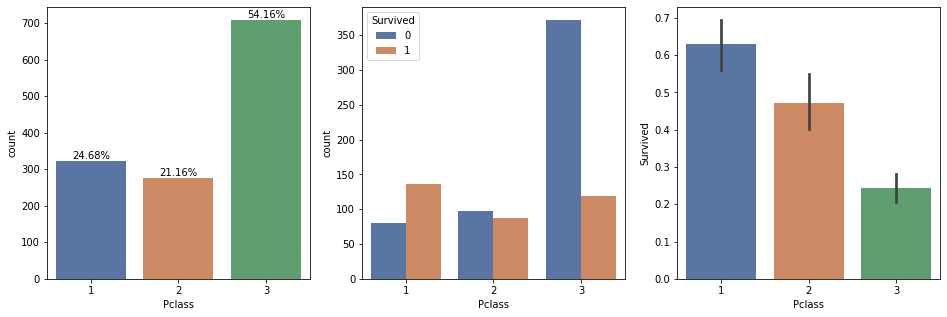

In [11]:
# Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd - ordinal feature.

sns.set_palette('deep')

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(all_data['Pclass'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['Pclass'].shape[0] * 100),
            ha='center')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax2)

sns.barplot(x='Pclass', y='Survived', data=data, ax=ax3)

In [12]:
# Most people had 3rd class ticket. 3rd Pclass people mostly not survived.
# 1st Pclass people mostly survived.

data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


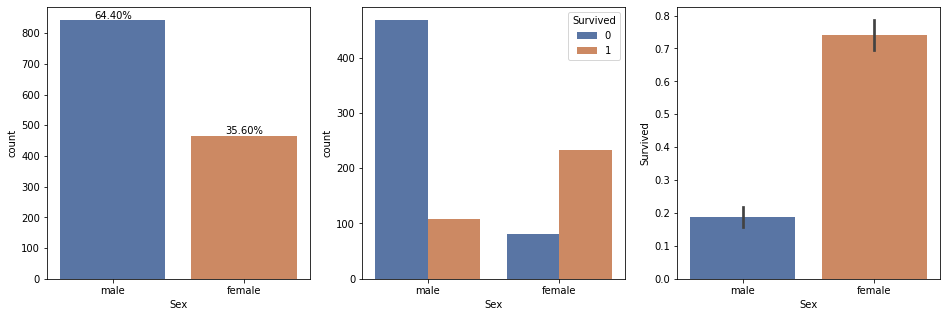

In [13]:
# Sex - male/female, categorical (nominal) feature.

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(all_data['Sex'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['Sex'].shape[0] * 100),
            ha='center')

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax2)

sns.barplot(x='Sex', y='Survived', data=data, ax=ax3)

In [14]:
# Most people were males with less chance to survive

data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# Name - all values are unique, text feature, cannot be visualized.

pd.DataFrame(all_data['Name'].describe())

,Name
count,1309
unique,1307
top,"Kelly, Mr. James"
freq,2


In [16]:
# Name feature contain Title feature to extract (Mr, Mrs etc.)

pd.DataFrame(data['Name'].head(10))

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


Percentage of missing values in Age (train) : 19.87 %
Percentage of missing values in Age (test) : 20.57 %
Minimum passenger age: 0.17
Maximum passenger age: 80.0


Text(0.5, 1.0, 'Age density plot over histogram')

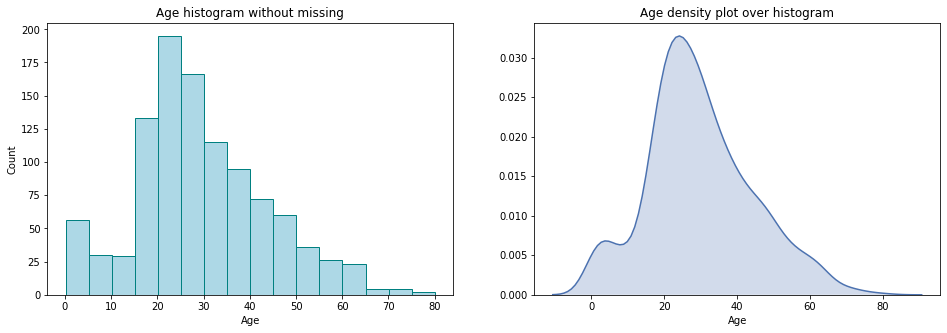

In [17]:
# Age - in years, contains missing values. Numerical continuous feature.

print('Percentage of missing values in Age (train) : {:.2f} %'.format(data['Age'].isnull().sum()/data.shape[0]*100))
print('Percentage of missing values in Age (test) : {:.2f} %'.format(test_data['Age'].isnull().sum()/test_data.shape[0]*100))
print('Minimum passenger age: {}'.format(all_data['Age'].min()))
print('Maximum passenger age: {}'.format(all_data['Age'].max()))

# Print Age histogram with binwidth of 5 years

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
ax1.hist(all_data[all_data['Age'].notnull()]['Age'], color='lightblue', edgecolor='teal', bins=16)
ax1.set(xlabel='Age', ylabel='Count', title='Age histogram without missing')

# Plot Age feature shaded density plot

sns.distplot(all_data[all_data['Age'].notnull()]['Age'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax2)
plt.title('Age density plot over histogram')

Number of people with Age present: 714
Age present and Survived: 290
Age present and Died: 424


Text(0.5, 1.0, 'Age density plot for Survived and Died people')

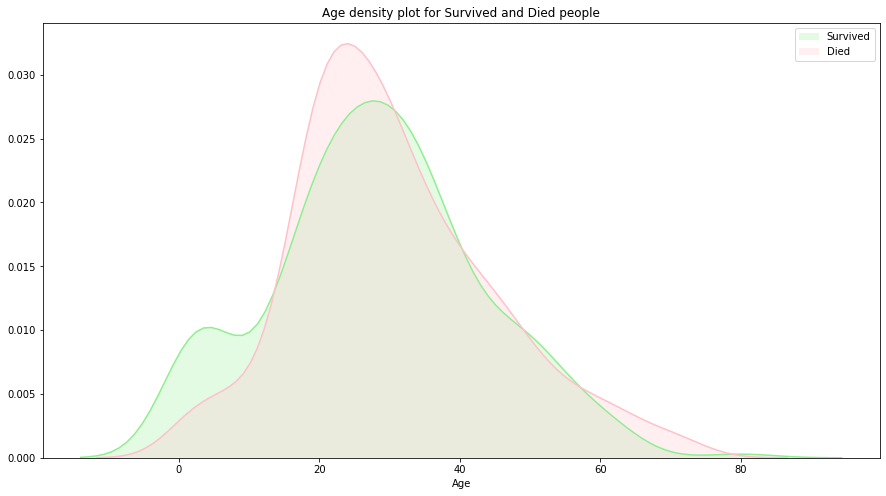

In [18]:
# Plot Age impact on the target variable

print('Number of people with Age present: {}'.format(data[data['Age'].notnull()]['Age'].shape[0]))

# Create separate dataframe without missing values in Age
age_present_data = data[data['Age'].notnull()]

print('Age present and Survived: {}'.format(age_present_data[['Age', 'Survived']][age_present_data.Survived==1].shape[0]))
print('Age present and Died: {}'.format(age_present_data[['Age', 'Survived']][age_present_data.Survived==0].shape[0]))

# Density plot of Age feature for Survived and Died People
plt.figure(figsize=(15,8))
sns.distplot(age_present_data['Age'][age_present_data.Survived==1],
             hist=False, kde=True, kde_kws={'shade':True}, color='lightgreen')
sns.distplot(age_present_data['Age'][age_present_data.Survived==0],
             hist=False, kde=True, kde_kws={'shade':True}, color='pink')
plt.legend(['Survived', 'Died'])
plt.title('Age density plot for Survived and Died people')

In [19]:
# Children (under 15-16 years) mostly survived.
# People older than 60 mostly died.
# Young people (16-35 years) mostly not survived.

# From numerical continuous Age feature can be converted into categorical:
# under 16, 16 - 35, 35-60, older than 60                                   

# IsChild Feature may be added for separating people under 16.             # 0.78947 accuracy

# Another approach - define and divide Age data in intervals of equal size based on quantiles

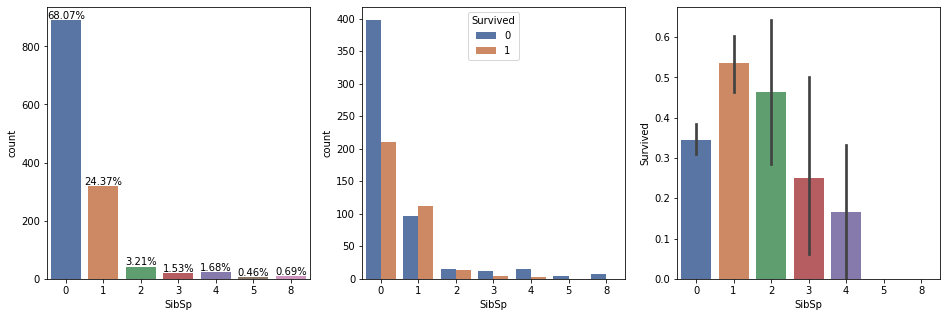

In [20]:
# SibSp - numerical discrete feature

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(all_data["SibSp"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['SibSp'].shape[0] * 100),
            ha="center")

sns.countplot(x="SibSp", hue="Survived", data=data, ax=ax2)

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax3)

In [21]:
# Most people had no siblings/spouses or just one.
# People with 1 SibSp were more likely to survive than people with other SibSp number variant
# Survival rate: 1, 2, 0, 3, 4.

data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


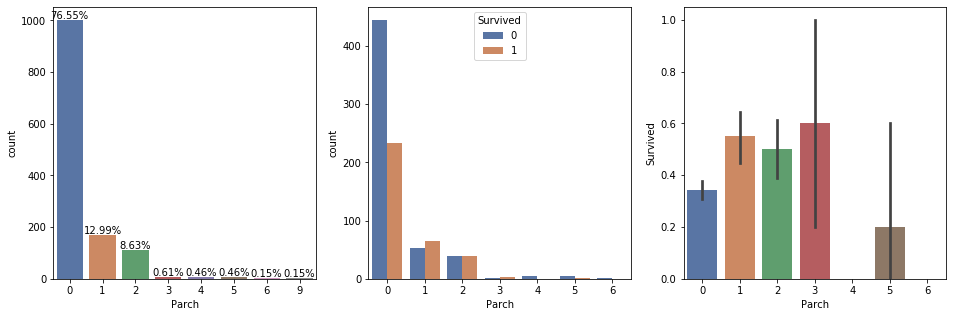

In [22]:
# Parch - numerical discrete feature

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(all_data["Parch"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['Parch'].shape[0] * 100),
            ha="center")

sns.countplot(x="Parch", hue="Survived", data=data, ax=ax2)
sns.barplot(x='Parch', y='Survived', data=data, ax=ax3)

In [23]:
# Most people had no parents/children or just 1-2 of these
# 1-2 Parch people were more likely to survive than people with other Parch number variant
# Survival rate: 3, 1, 2, 0, 5

# Parch and SibSp features can be grouped into FamilySize feature
# Alone feature may be created

data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [24]:
# Ticket - text feature with a lot of unique values, cannot be visualized.

pd.DataFrame(data['Ticket'].describe())

,Ticket
count,891
unique,681
top,347082
freq,7


In [25]:
# Fare - ticket fare, contains missing values. Numerical continuous feature.

print('Percentage of missing values in Fare (train) : {:.2f} %'.format(data['Fare'].isnull().sum()/data.shape[0]*100))
print('Percentage of missing values in Fare (test) : {:.2f} %'.format(test_data['Fare'].isnull().sum()/test_data.shape[0]*100))
print('Minimum passenger fare: {}'.format(all_data['Fare'].min()))
print('Maximum passenger fare: {}'.format(all_data['Fare'].max()))

Percentage of missing values in Fare (train) : 0.00 %
Percentage of missing values in Fare (test) : 0.24 %
Minimum passenger fare: 0.0
Maximum passenger fare: 512.3292


Text(0.5, 1.0, 'Fare density plot over histogram')

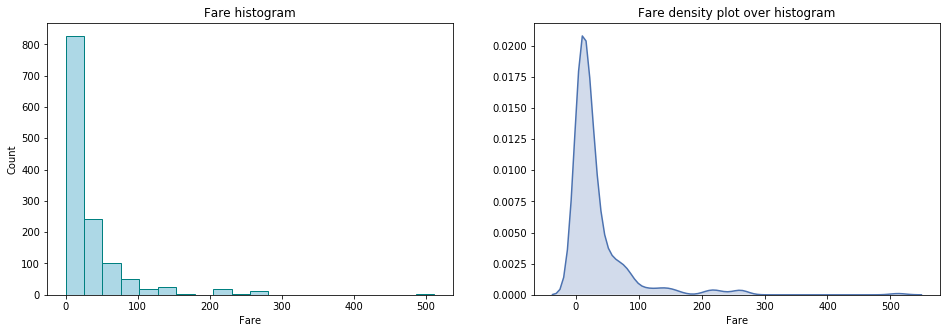

In [26]:
# Train data has no missing values in Fare column.
# Print Fare histogram
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
ax1.hist(all_data[all_data['Fare'].notnull()]['Fare'], color='lightblue', edgecolor='teal', bins=20)
ax1.set(xlabel='Fare', ylabel='Count', title='Fare histogram')

# Plot shaded density plot of Fare feature
sns.distplot(all_data[all_data['Fare'].notnull()]['Fare'], hist=False, kde=True, kde_kws={'shade':True}, ax=ax2)
plt.title('Fare density plot over histogram')

Text(0.5, 1.0, 'Fare density plot for Survived and Died people')

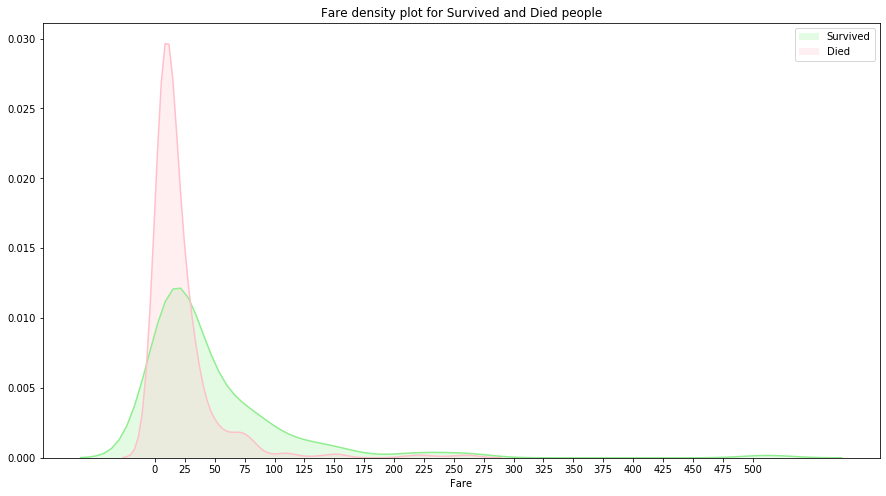

In [27]:
# Plot Fare impact on the target variable

# Density plot of Fare feature for Survived and Died People

plt.figure(figsize=(15,8))
sns.distplot(data['Fare'][data.Survived==1],
             hist=False, kde=True, kde_kws={'shade':True}, color='lightgreen')
sns.distplot(data['Fare'][data.Survived==0],
             hist=False, kde=True, kde_kws={'shade':True}, color='pink')
plt.xticks(np.arange(0, 512, 25))
plt.legend(['Survived', 'Died'])
plt.title('Fare density plot for Survived and Died people')

In [28]:
# Most people with Fare bigger than 30 were more likely to survive.
# From numerical Fare feature can be converted into categorical: less than 30 or more than 30.   # 0.78947

# Another approach - define and divide Fare data in intervals of equal size based on quantiles

In [29]:
# Cabin - number of cabin, text feature with missing values in train and test data.

pd.DataFrame(data[data['Cabin'].notnull()]['Cabin'])

,Cabin
1,C85
3,C123
6,E46
10,G6
11,C103
21,D56
23,A6
27,C23 C25 C27
31,B78
52,D33


In [30]:
# Absence in Cabin data may convert this feature into binary: present|absent cabin

print('Percentage of missing values in Cabin (train) : {:.2f} %'.format(data['Cabin'].isnull().sum()/data.shape[0]*100))
print('Percentage of missing values in Cabin (test) : {:.2f} %'.format(test_data['Cabin'].isnull().sum()/test_data.shape[0]*100))
pd.DataFrame(data['Cabin'].describe())

# New feature - Deck may be created created by extracting the first letter of Cabin
# Deck doesn't help

Percentage of missing values in Cabin (train) : 77.10 %
Percentage of missing values in Cabin (test) : 78.23 %


,Cabin
count,204
unique,147
top,B96 B98
freq,4


Percentage of missing values in Embarked (train) : 0.00224 %


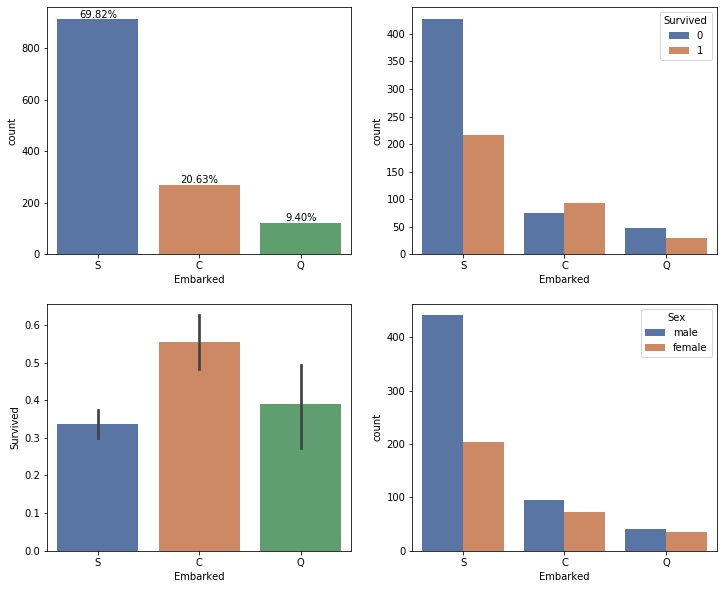

In [31]:
# Embarked: C = Cherbourg, Q = Queenstown, S = Southampton - port name
# Categorical feature with missing values in train data

print('Percentage of missing values in Embarked (train) : {:.5f} %'.format(data['Embarked'].isnull().sum()/data.shape[0]))

# Plot how many people embarked at different ports
# Plot how many people survived from these ports
# Plot counts of men and women embarked at different ports

fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(all_data["Embarked"], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['Embarked'].shape[0] * 100),
            ha="center")

sns.countplot(x="Embarked", hue="Survived", data=data, ax=ax2)
sns.barplot(x='Embarked', y='Survived', data=data, ax=ax3)
sns.countplot(x="Embarked", hue="Sex", data=data, ax=ax4)

In [32]:
# People from port C were more likely to survive.
# Most people embarked at port S.
# Among people who embarked at all three ports number of males was bigger.

### Сonclusions

1. Pclass - important ordinal feature, should be used.

2. Name - will be dropped.
    - Title - categorical feature, should be created and used.
    - Encode categorical feature
    
3. Sex - important categorical feature, should be used.

4. Age - important numerical feature, should be used.

    - Age may be converted to ordinal. 
    
    - Impute missing values in train.
    
    - Impute missing values in test.
    
    - IsChild - binary feature, may be created and used.
    
5. SibSp - important numerical feature.

6. Parch - important numerical feature.

    - FamilySize - numerical feature, should be created.
    
    - IsAlone - binary feature, may be created.
    
7. Ticket - will be dropped.

8. Fare - important numerical feature.

    - Fare may be converted into ordinal.
    
    - Impute missing values in test data.
    
9. Cabin - will be dropped.

    - HasCabin - binary feature, may be created after: 
    
    - Impute missing values in train.
    
    - Impute missing values in test.
    
    - Create Deck feature.
    
10. Embarked - categorical feature, will be used.

    - Impute missing values in train data
    - Encode categorical feature

### Next step:
Impute missing values and use base models with no preprocessing.

In [33]:
# Fill mising Age values in train data 
# data['Age'].fillna(data['Age'].median(skipna=True), inplace=True)

# Fill mising Age values in test data 
# test_data['Age'].fillna(test_data['Age'].median(skipna=True), inplace=True)

# Fill missing Age data with median value by person's Title
# Age distribution is positively skewed ==> median is more appropriate than mean for summarizing the center 

# Extract and list titles from Name 
all_data.loc[:, 'Title'] = all_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
all_data.loc[:, 'Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Dona          1
Countess      1
Capt          1
Sir           1
Mme           1
Lady          1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [34]:
# Combine extracted titles into groups 

all_data.loc[:, 'Title'] = all_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Jonkheer', 'Countess',
                                      'Sir', 'Don', 'Dona', 'Capt', 'Lady'], 'Rare title')
all_data.loc[:, 'Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data.loc[:, 'Title'] = all_data['Title'].replace('Mme', 'Mrs')
all_data.loc[:, 'Title'].value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Rare title     29
Name: Title, dtype: int64

In [35]:
# Fill missing Age values

all_data['Age'].fillna(all_data.groupby('Title')['Age'].transform('median'), inplace=True)

In [36]:
# Check for missing values
print('Missing values in Age (train): {}'.format(all_data['Age'][:891].isnull().sum()))
print('Missing values in Age (test): {}'.format(all_data['Age'][891:].isnull().sum()))

Missing values in Age (train): 0
Missing values in Age (test): 0


In [37]:
# Fare - 1 missing value in test data
all_data[all_data['Fare'].isnull()]
# Male, 3rd Pclass, no family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [38]:
# Fill missing Fare with median for alone men 3rd class
fill_fare = all_data.groupby(['Pclass', 'Sex', 'Parch', 'SibSp'])['Fare'].median()[3]['male'][0][0]
print(fill_fare)

7.8875


In [39]:
# Fill missing Fare values
# all_data['Fare'].fillna(all_data['Fare'].median(skipna=True), inplace=True)

all_data['Fare'].fillna(fill_fare, inplace=True)

# Check for missing values
print('Missing values in Fare (test): {}'.format(all_data['Fare'][891:].isnull().sum()))

Missing values in Fare (test): 0


In [40]:
# Fill missing Cabin values
all_data['Cabin'].fillna('No cabin', inplace=True)

# Check for missing values
print('Missing values in Cabin (train): {}'.format(all_data['Cabin'][:891].isnull().sum()))
print('Missing values in Cabin (test): {}'.format(all_data['Cabin'][891:].isnull().sum()))

Missing values in Cabin (train): 0
Missing values in Cabin (test): 0


In [41]:
# Remove 2 samples with missing Port of Embarkation
# data = data[data['Embarked'].notnull()]

# survived_train = data[data['Embarked'].notnull()]['Survived']

# Fill missing Embarked values with mode
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

# Check if data contains no missing values
display(all_data.isnull().sum())
display(all_data.head(10))

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No cabin,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No cabin,S,Mr
5,6,0.0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,No cabin,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,No cabin,S,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,No cabin,S,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,No cabin,C,Mrs


In [42]:
# Use decision tree as a base model because:
# 1) it requires no preprocessing
# 2) features can be on different scales
# 3) features can be mixed: continuous + categorical

base_data = all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']][:891]
base_target = data[['Survived']]

In [43]:
# Encode non-numerical features for modeling

encode = base_data.select_dtypes(include='object').columns
for feature in encode:
    le = LabelEncoder()
    base_data[feature] = le.fit_transform(base_data[feature])

In [44]:
# Make Sex, Embarked categorical
# base_data = pd.get_dummies(base_data, columns=['Sex', 'Embarked'])
X_train, X_test, y_train, y_test = train_test_split(base_data, base_target, stratify=base_target, random_state=42)

In [45]:
base_tree = DecisionTreeClassifier(random_state=0)
base_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [46]:
# Accuracy of unrestricted tree base model without preprocessing

print("Accuracy on training set: {:.3f}".format(base_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(base_tree.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.726


Text(0, 0.5, 'Feature')

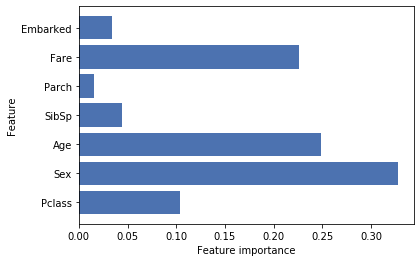

In [47]:
# Plot feature importances found by base model

n_features = base_data.shape[1]
plt.barh(range(n_features), base_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), base_data.columns.values)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [48]:
# Base model finds Sex, Age, Fare and Pclass features as the most predictive of target 

# Create new features according to previous conclusions

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No cabin,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No cabin,S,Mr


In [49]:
# Survival rate by Title
all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',
                                                                                      ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare title,0.347826
2,Mr,0.156673


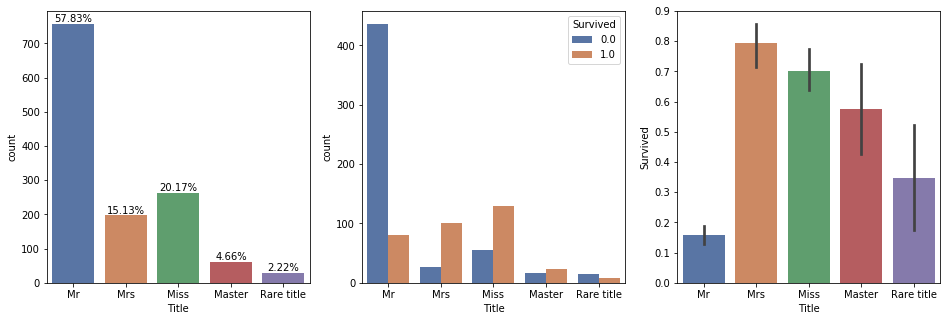

In [50]:
# Plot counts of people with different titles
# Plot how many people with different titles survived|died

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(all_data['Title'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['Title'].shape[0] * 100),
            ha='center')
sns.countplot(x='Title', hue='Survived', data=all_data[:891], ax=ax2)
sns.barplot(x='Title', y='Survived', data=all_data[:891], ax=ax3)

In [51]:
# Mrs and Miss were more likeky to survive

# Encode categorical title
title_mapping = {'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare title': 4, 'Mr': 5}
all_data.loc[:, 'Title'] = all_data['Title'].map(title_mapping)

# Drop Name feature
# all_data = all_data.drop(['Name'], axis=1)

# Add binary feature IsMarried
all_data['IsMarried'] = 0
all_data.loc[all_data['Title'] == 1, 'IsMarried'] = 1

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No cabin,S,5,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No cabin,S,5,0


In [52]:
# Encode categorical sex

all_data['Sex'] = all_data['Sex'].map({'female': 1, 'male': 2}).astype(int)

all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsMarried
0,1,0.0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,No cabin,S,5,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0.0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,No cabin,S,5,0


In [53]:
# Visible Age categories (in years): under 16, 16 - 35, 35-60, older than 60

# Train data - create AgeCat feature 
#data.loc[data['Age'] <= 16, 'AgeCat'] = 0
#data.loc[(data['Age'] > 16) & (data['Age'] <=35), 'AgeCat'] = 1
#data.loc[(data['Age'] > 35) & (data['Age'] < 60), 'AgeCat'] = 2
#data.loc[data['Age'] >= 60, 'AgeCat'] = 3

all_data['AgeCat'] = pd.qcut(all_data['Age'], 4)
#all_data['AgeCat'] = pd.qcut(all_data['Age'], 11)

CategoricalDtype(categories=[(0.169, 22.0], (22.0, 29.0], (29.0, 35.0], (35.0, 80.0]],
              ordered=True)

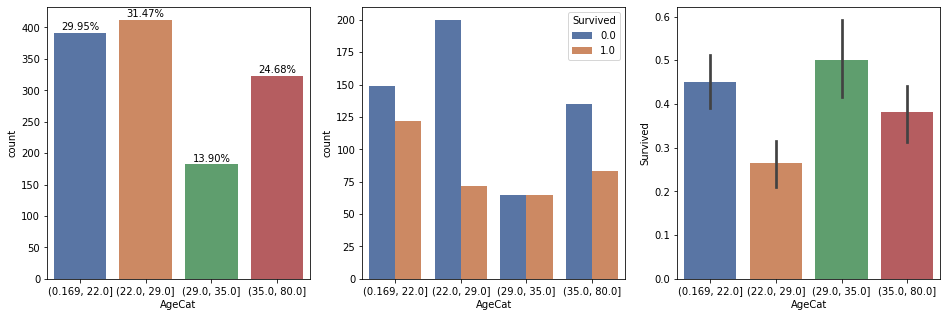

In [54]:
# AgeCat - new categorical feature with ordering sense
display(all_data['AgeCat'].dtype)

# Plot counts of people with different AgeCat categories
# How many people with different AgeCat category survived|died

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16, 5))
sns.countplot(all_data['AgeCat'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['AgeCat'].shape[0] * 100),
            ha='center')
sns.countplot(x='AgeCat', hue='Survived', data=all_data[:891], ax=ax2)
sns.barplot(x='AgeCat', y='Survived', data=all_data[:891], ax=ax3)

In [55]:
# Survival rate by AgeCat category
all_data[['AgeCat', 'Survived']].groupby(['AgeCat'], as_index=False).mean().sort_values(by='Survived',
                                                                                        ascending=False)

,AgeCat,Survived
2,"(29.0, 35.0]",0.500000
0,"(0.169, 22.0]",0.450185
3,"(35.0, 80.0]",0.380734
1,"(22.0, 29.0]",0.264706


In [56]:
# Encode categorical AgeCat

le = LabelEncoder()
all_data['AgeCatType'] = le.fit_transform(all_data['AgeCat'])

In [57]:
# Add binary feature IsChild 

all_data['Child'] = np.where(all_data['Age'] <= 16, 1, 0)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsMarried,AgeCat,AgeCatType,Child
0,1,0.0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,No cabin,S,5,0,"(0.169, 22.0]",0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1,"(35.0, 80.0]",3,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,2,0,"(22.0, 29.0]",1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1,"(29.0, 35.0]",2,0
4,5,0.0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,No cabin,S,5,0,"(29.0, 35.0]",2,0


In [58]:
# Test data
#test_data.loc[test_data['Age'] <= 16, 'AgeCat'] = 0
#test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <=35), 'AgeCat'] = 1
#test_data.loc[(test_data['Age'] > 35) & (test_data['Age'] < 60), 'AgeCat'] = 2
#test_data.loc[test_data['Age'] >= 60, 'AgeCat'] = 3

#test_data['Child'] = np.where(test_data['AgeCat'] == 0, 1, 0)
#test_data.head()

In [59]:
# Create numerical feature FamilySize
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
#test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create binary feature Alone
all_data['Alone'] = np.where(all_data['FamilySize'] == 1, 1, 0)
#test_data['Alone'] = np.where(test_data['FamilySize'] == 1, 1, 0)

In [61]:
# Survival rate for alone people|people with family
all_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean().sort_values(by='Survived',
                                                                                      ascending=False)

# People with family were more likely to survive

,Alone,Survived
0,0,0.505650
1,1,0.303538


In [62]:
# Survival rate people with different FamilySize
all_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',
                                                                                                ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


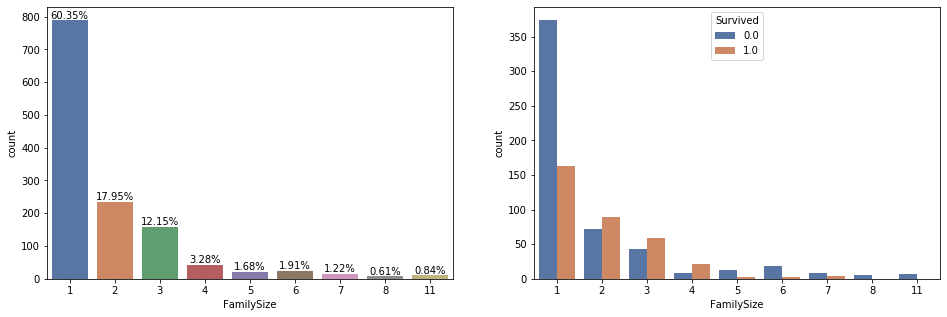

In [63]:
# Plot counts of people with different FamilySize
# How many people with different FamilySize survived|died

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(all_data['FamilySize'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['FamilySize'].shape[0] * 100),
            ha='center')
sns.countplot(x='FamilySize', hue='Survived', data=all_data[:891], ax=ax2)

In [64]:
# Define intervals in FamilySize
#all_data['FamilySizeCat'] = pd.cut(all_data['FamilySize'], 4)

#all_data[['FamilySizeCat', 'Survived']].groupby(['FamilySizeCat'],
#                                                as_index=False).mean().sort_values(by='Survived',
#
#ascending=False)

family_size_mapping = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small',
                       5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large',
                       11: 'Large'}
all_data.loc[:, 'FamilySizeCat'] = all_data['FamilySize'].map(family_size_mapping)

In [65]:
# Encode categorical FamilySize

#all_data.loc[(all_data['FamilySize'] <= 6) & (all_data['FamilySize'] > 3.5), 'FamilySizeType'] = 1
#all_data.loc[all_data['FamilySize'] <= 3.5, 'FamilySizeType'] = 2
#all_data.loc[(all_data['FamilySize'] > 6) & (all_data['FamilySize'] <= 8.5), 'FamilySizeType'] = 3
#all_data.loc[(all_data['FamilySize'] > 8.5) & (all_data['FamilySize'] <= 11), 'FamilySizeType'] = 4

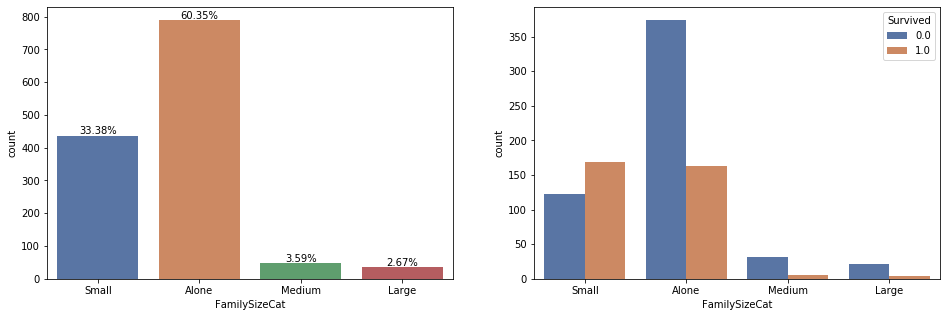

In [66]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(all_data['FamilySizeCat'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['FamilySize'].shape[0] * 100),
            ha='center')
sns.countplot(x='FamilySizeCat', hue='Survived', data=all_data[:891], ax=ax2)

In [67]:
all_data['FamilySizeCat'] = all_data['FamilySizeCat'].map({'Small': 1, 'Alone': 2,
                                                          'Medium': 3, 'Large': 4}).astype(int)

In [68]:
# Drop SibSp, Parch and Ticket features from  data
#all_data = all_data.drop(['SibSp', 'Parch'], axis=1)
#test_data = test_data.drop(['SibSp', 'Parch', 'Ticket'], axis=1)

In [69]:
# Visible Fare categories: less than 30, more than 30, create FareCat categorical feature

# Train data
#data.loc[data['Fare'] <= 30, 'FareCat'] = 0
#data.loc[data['Fare'] > 30, 'FareCat'] = 1

# Test data
#test_data.loc[test_data['Fare'] <= 30, 'FareCat'] = 0
#test_data.loc[test_data['Fare'] > 30, 'FareCat'] = 1

all_data['FareCat'] = pd.qcut(all_data['Fare'], 4)

#all_data['FareCat'] = pd.qcut(all_data['Fare'], 13)

all_data[['FareCat', 'Survived']].groupby(['FareCat'],
                                                as_index=False).mean().sort_values(by='Survived',
                                                                                                ascending=False)

,FareCat,Survived
3,"(31.275, 512.329]",0.600000
2,"(14.454, 31.275]",0.441048
1,"(7.896, 14.454]",0.303571
0,"(-0.001, 7.896]",0.197309


In [70]:
le = LabelEncoder()
all_data['FareCatType'] = le.fit_transform(all_data['FareCat'])

In [71]:
# Survival rate people with different FareCat 
all_data[['FareCatType', 'Survived']].groupby(['FareCatType'],
                                              as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareCatType,Survived
3,3,0.600000
2,2,0.441048
1,1,0.303571
0,0,0.197309


In [72]:
# Create HasCabin feature
all_data['HasCabin'] = 1
all_data.loc[all_data['Cabin'] == 'No cabin', 'HasCabin'] = 0

# Test data
#test_data['HasCabin'] = 1
#test_data.loc[test_data['Cabin'] == 'No cabin', 'HasCabin'] = 0

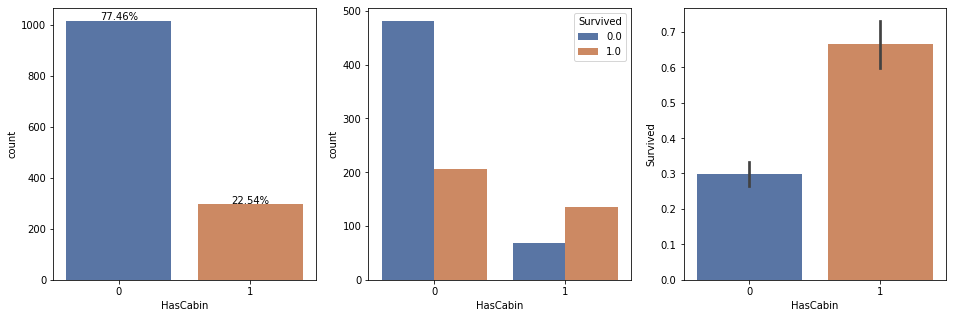

In [73]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(16,5))
sns.countplot(all_data['HasCabin'], ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:1.2f}%'.format(height / all_data['HasCabin'].shape[0] * 100),
            ha='center')
sns.countplot(x='HasCabin', hue='Survived', data=all_data[:891], ax=ax2)
sns.barplot(x='HasCabin', y='Survived', data=all_data[:891], ax=ax3)

In [74]:
# Drop Cabin feature
#all_data = all_data.drop(['Cabin'], axis=1)
#test_data = test_data.drop(['Cabin'], axis=1)

In [75]:
# Encode categorical Embarked feature 

all_data['Embarked'] = all_data['Embarked'].map( {'S': 3, 'C': 1, 'Q': 2} ).astype(int)
#test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [76]:
all_data.drop(columns=['Age', 'Fare', 'AgeCat', 'PassengerId', 'Cabin',
                       'FareCat', 'Name', 'Ticket', 'SibSp', 'Parch'], inplace=True)

In [77]:
# Divide back into train and test data

data = all_data[:891]
test_data = all_data[891:]

In [78]:
print('Number of samples in train data: ', data.shape[0])
print('Number of columns in train data: ', data.shape[1])
print('Number of samples in test data: ', test_data.shape[0])
print('Number of columns in test data: ', test_data.shape[1])

Number of samples in train data:  891
Number of columns in train data:  13
Number of samples in test data:  418
Number of columns in test data:  13


,Survived,Pclass,Sex,Embarked,Title,IsMarried,AgeCatType,Child,FamilySize,Alone,FamilySizeCat,FareCatType,HasCabin
0,0.0,3,2,3,5,0,0,0,2,0,1,0,0
1,1.0,1,1,1,1,1,3,0,2,0,1,3,1
2,1.0,3,1,3,2,0,1,0,1,1,2,1,0
3,1.0,1,1,3,1,1,2,0,2,0,1,3,1
4,0.0,3,2,3,5,0,2,0,1,1,2,1,0


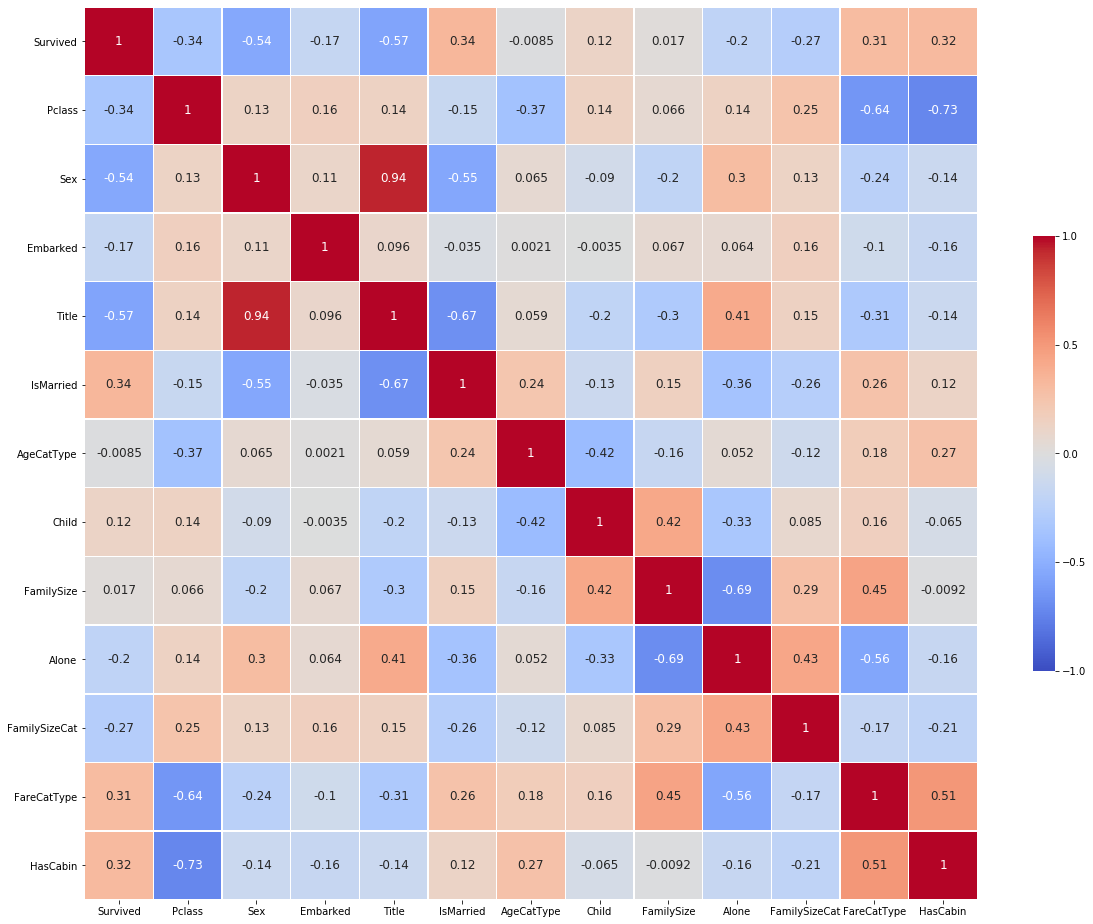

In [79]:
# Plot correlation matrix of features + target

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(20, 20))
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

display(data.head())

In [80]:
# Prepare data for modeling

base_data_2 = data[['Pclass', 'Sex', 'AgeCatType', 'FareCatType', 'Title',
                    'FamilySize', 'Alone', 'Child', 'IsMarried']]
base_target_2 = data['Survived']

In [81]:
# 0.80382 top 11
#base_data_2 = data[['Pclass', 'Sex', 'AgeCatType', 'FareCatType', 'Title',
#                    'FamilySize', 'Alone', 'Child']]
# Best parameters:  {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 500}

In [82]:
test_data = test_data[['Pclass', 'Sex', 'AgeCatType', 'FareCatType', 'Title',
                    'FamilySize', 'Alone', 'Child', 'IsMarried']]

In [83]:
# Check data shapes

print('Features shape: {}'.format(base_data_2.shape))
print('Target shape: {}'.format(base_target_2.shape))
print('Test data shape: {}'.format(test_data.shape))

Features shape: (891, 9)
Target shape: (891,)
Test data shape: (418, 9)


In [84]:
# Tune the hyper-parameters of classifiers with GridSearch CV

# kNN

# Perform scaling

sc = StandardScaler()
scaled_data = sc.fit_transform(base_data_2)
scaled_test_data = sc.transform(test_data)

knn_grid = [{'n_neighbors': list(range(1, 25)),
            'weights': ['uniform', 'distance']}]
knn_gs = GridSearchCV(KNeighborsClassifier(),
                 param_grid=knn_grid, scoring='accuracy',
                  cv=10, iid=False)
knn_gs.fit(scaled_data, base_target_2)
best_acc_knn = knn_gs.best_score_
best_params_knn = knn_gs.best_params_
print('kNN best score {:.6f}'.format(best_acc_knn))
print('Best parameters: ', best_params_knn)

kNN best score 0.833866
Best parameters:  {'n_neighbors': 6, 'weights': 'uniform'}


In [85]:
# Logistic regression

logreg_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
logreg_gs = GridSearchCV(LogisticRegression(solver='lbfgs'),
                        param_grid=logreg_grid, scoring='accuracy',
                        cv=10, iid=False)
logreg_gs.fit(scaled_data, base_target_2)
best_acc_logreg = logreg_gs.best_score_
best_params_logreg = logreg_gs.best_params_
print('Logistic Regresion best score {:.4f}'.format(best_acc_logreg))
print('Best parameters: ', best_params_logreg)

Logistic Regresion best score 0.8238
Best parameters:  {'C': 10}


In [86]:
# Linear SVM

prep_data = base_data_2.astype('float')
scaler = MinMaxScaler()
prep_data = scaler.fit_transform(prep_data)

linearSVM_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
linearSVM_gs = GridSearchCV(LinearSVC(max_iter=1000000, random_state=0),
                        param_grid=linearSVM_grid, scoring='accuracy',
                        cv=10)
linearSVM_gs.fit(prep_data, base_target_2)
best_acc_linearSVM = linearSVM_gs.best_score_
best_params_linearSVM = linearSVM_gs.best_params_
print('Linear SVM best score {:.4f}'.format(best_acc_linearSVM))
print('Best parameters: ', best_params_linearSVM)

Linear SVM best score 0.8294
Best parameters:  {'C': 10}


In [87]:
# Decision tree 
# Invariant to scaling of the data

tree_grid = [{'max_depth': list(range(1, 15)),
             'min_samples_split': list(range(2, 20)),
             'max_features': ['auto', 'log2']}]
tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=0),
                      param_grid=tree_grid, scoring='accuracy',
                      cv=10, iid=False)
tree_gs.fit(base_data_2, base_target_2)
best_acc_tree = tree_gs.best_score_
best_params_tree_gs = tree_gs.best_params_
print('Single tree best score {:.4f}'.format(best_acc_tree))
print('Best parameters: ', best_params_tree_gs)

Single tree best score 0.8328
Best parameters:  {'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 10}


In [88]:
# Random Forest

forest_grid = [{'n_estimators': [10, 50, 100, 300, 500],
               'max_features': ['auto', 'log2'],
               'max_depth': [1, 4, 5, 6, 8, 10, 15],
               'min_samples_split': [2, 4, 10],
               'min_samples_leaf': [2, 4, 6]}]
forest_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                        param_grid=forest_grid, scoring='accuracy',
                        cv=10, n_jobs=-1, iid=False)
forest_gs.fit(base_data_2, base_target_2)
best_acc_forest = forest_gs.best_score_
best_params_forest = forest_gs.best_params_
print('Random forest best score {:.4f}'.format(best_acc_forest))
print('Best parameters: ', best_params_forest)

Random forest best score 0.8440
Best parameters:  {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [89]:
# Gradient boosting machines

gb_grid = [{'max_depth': [1, 2, 3, 4, 5],
           'n_estimators': [10, 30, 50, 70, 100, 500],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.7, 0.5, 1] }]
gb_gs = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                    param_grid=gb_grid, scoring='accuracy',
                    cv=10, n_jobs=-1)
gb_gs.fit(base_data_2, base_target_2)
best_acc_gb = gb_gs.best_score_
best_params_gb = gb_gs.best_params_
print('Gradient boosting best score {:.4f}'.format(best_acc_gb))
print('Best parameters: ', best_params_gb)

Gradient boosting best score 0.8384
Best parameters:  {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 500}


In [90]:
# Support Vector Machines

svc_grid = [{'kernel': ['linear'], 'C': [0.0001, 0.001, 0.01, 0.1]},
            {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5], 'C': [0.0001, 0.001, 0.01, 0.1, 1],
            'gamma': [0.001, 0.01, 0.1, 1, 1.5]},
            {'kernel': ['rbf'], 'gamma': [0.01, 0.1], 'C': [0.001, 0.01]},
            {'kernel': ['sigmoid'], 'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1]}]

svc_gs = GridSearchCV(SVC(random_state=0), param_grid=svc_grid,
                     scoring='accuracy', cv=10, n_jobs=-1, iid=False)
svc_gs.fit(scaled_data, base_target_2)
best_acc_svc = svc_gs.best_score_
best_params_svc = svc_gs.best_params_
print('SVC best score {:.4f}'.format(best_acc_svc))
print('Best parameters: ', best_params_svc)

SVC best score 0.8328
Best parameters:  {'C': 0.0001, 'degree': 4, 'gamma': 1.5, 'kernel': 'poly'}


In [91]:
# Estimate classifiers using cross-validation

classifiers = [KNeighborsClassifier(n_neighbors=6, weights='uniform'),
               LogisticRegression(solver='lbfgs', C=10),
               LinearSVC(max_iter=1000000, C=10),
               DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_split=10),
               RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=4, 
                                      min_samples_split=2, n_estimators=300),
               GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=500),
               SVC(kernel='poly', C=0.001, degree=4, gamma=1.5)]
train_data = [scaled_data, scaled_data, prep_data, base_data_2, base_data_2, base_data_2, scaled_data]
classifiers_names = ['kNN', 'LogRegression', 'Linear SVM',
                    'Decision Tree', 'Random Forest', 'Gradient Boosting',
                    'SVC']
for classifier, tr_data, name in zip(classifiers, train_data, classifiers_names):
    classifier.fit(tr_data, base_target_2)
    accuracy = cross_val_score(estimator = classifier, X = tr_data, y = base_target_2, cv = 10)
    print(name, 'mean CV accuracy: {:.6f}'.format(accuracy.mean()), '\n')

kNN mean CV accuracy: 0.833866 

LogRegression mean CV accuracy: 0.823842 

Linear SVM mean CV accuracy: 0.829410 

Decision Tree mean CV accuracy: 0.820370 

Random Forest mean CV accuracy: 0.842868 

Gradient Boosting mean CV accuracy: 0.838361 

SVC mean CV accuracy: 0.813742 



In [92]:
# Use the most accurate model for prediction

random_forest = RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=4, 
                                      min_samples_split=2, n_estimators=300)
random_forest.fit(base_data_2, base_target_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
predictions = random_forest.predict(test_data).astype('int')

In [94]:
submission = pd.DataFrame({'PassengerId': passenger_id_test,
                           'Survived': predictions})
submission.to_csv('submission.csv', index=False)